# Lendo e visualizando imagens

## Objetivo

O objetivo deste notebook é demonstrar como carregar, visualizar e manipular imagens para deixá-las prontas para o processamento.

Exemplificaremos as operações usando as duas bibliotecas mas comuns:

- Matplotlib
- PIL

## A biblioteca PIL

A biblioteca PIL, ou Python Imaging Library, traz para o Python a capacidade de processar imagens. A biblioteca suporta vários formatos de arquivo e poderosas ferramentas de processamento de imagem.

Alguns dos usos da biblioteca são Arquivamento, fazendo processamento em lote de imagens, Exibição, suportando várias interfaces (GUIs) e Processamento, como redimensionamento, rotação, histograma, dentre outras.

### Importando a biblioteca PIL


In [143]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem

In [144]:
img = Image.open('../figures/versicolor.jpg')

In [145]:
type(img)
img.size, img.bits, img.format, img.mode

((400, 400), 8, 'JPEG', 'RGB')

### Mostrando uma imagem PIL

No jupyter-notebook, chamar o objeto que contém a imagem faz com que ela seja mostrada.

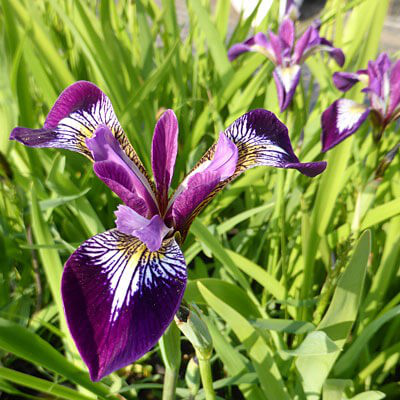

In [146]:
img

Ou também é possível usar o método display da classe IPython.display.

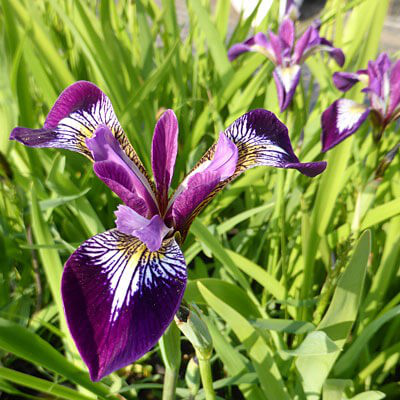

In [147]:
display(img)

### Dividindo os canais da imagem

Como a imagem anterior é colorida, ela contém os três canais (RGB - red, gree, blue). Com o método split é possível dividir os canais da imagens e visualizar cada um deles separadamente.

In [148]:
r,g,b = img.split()

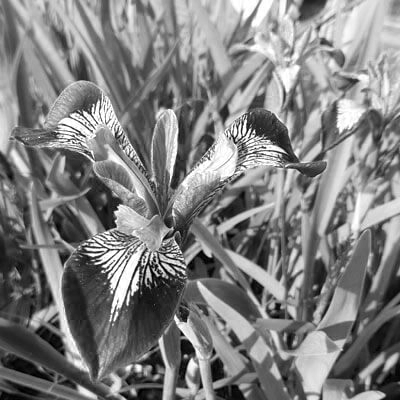

In [149]:
r

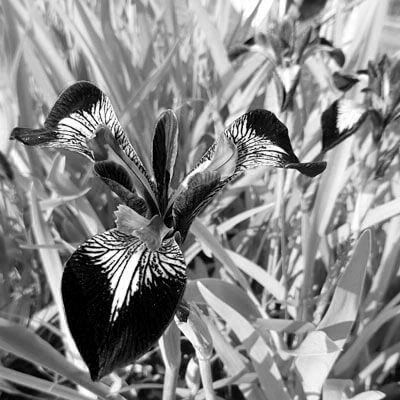

In [150]:
g

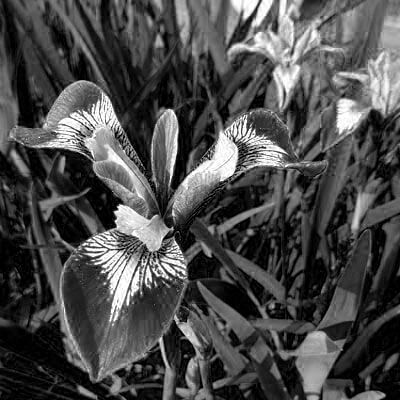

In [151]:
b

### Carregando a imagem com diferentes canais

Também é possível carregar a imagem somente com um canal, em escala de cinza, usando o método convert com o parâmetro L.


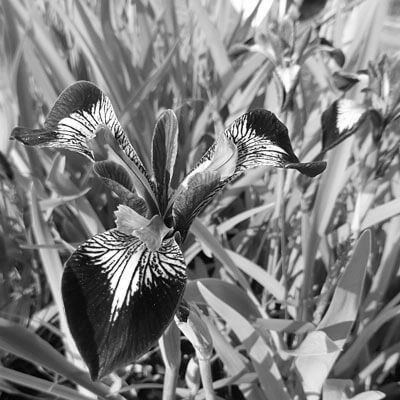

In [152]:
img1 = Image.open('../figures/versicolor.jpg').convert('L')
img1

### Salvando uma imagem em disco em formato diferente

Para salvar uma imagem em disco, usamos o método save passando como parâmetro o caminho para salvar a imagem. Caso seja necessário alterar o formato da imagem, é possível passar como parâmetro o formato desejado.


In [153]:
img1.save('../figures/versicolor_BW.png','png')

### Transformando uma imagem em um array numpy

Para transformar a imagem em um array numpy, usamos o método array da classe numpy.

In [154]:
numpy_img = np.array(img)

### Mostrando as dimensões e outras informações da imagem

Neste caso, a imagem possui 3 dimensões: a primeira é a altura da imagem, a segunda é a largura da imagem e a terceira contém os canais R, G, B da imagem.

In [155]:
numpy_img.shape, numpy_img.dtype, numpy_img.min(), numpy_img.max()

((400, 400, 3), dtype('uint8'), 0, 255)

No caso acima, a imagem está representada no formato *channels last*. Existem duas formas principais de representar a imagem no array:

- *channels first*
- *channels last*

Dependendo das bibliotecas a serem usadas, às vezes precisamos trocar as dimensões e passar a informação de canais para a primeira posição. Esta configuração é conhecida como *channels-first*.

In [156]:
numpy_img.transpose(2,0,1).shape

(3, 400, 400)

## A biblioteca Matplotlib

O Matplotlib é uma biblioteca para plotagem. Com ela é possível plotar pontos, funções, estatísticas e imagens.

### Importando a biblioteca

Nota: quando o Matplotlib é usando dentro do Jupyter-Notebook é necessário o uso do comando %matplotlib inline para que os gráficos sejam mostrados.

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

### Mostrando uma imagem no Matplotlib

Note que para mostrar uma imagem com a biblioteca Matplotlib, esta já precisa estar carregada em um objeto.

A biblioteca Matplotlib consegue mostrar tanto imagens coloridas no formato PIL quando arrays NumPy no formato channels last.

### Mostrando uma imagem no formato array numpy:

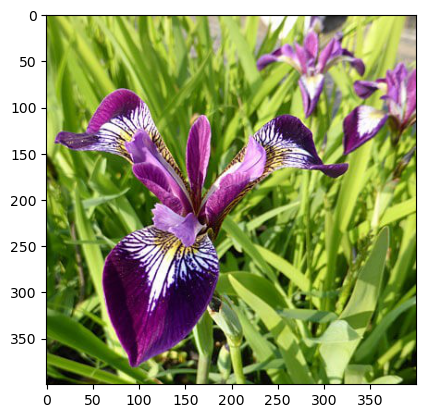

In [158]:
plt.imshow(numpy_img)

### Mostrando uma imagem no formato PIL:

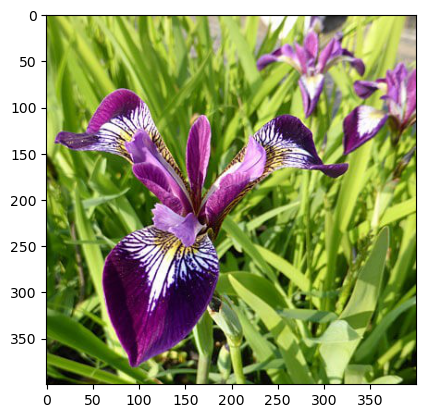

In [159]:
plt.imshow(img)

### Manipulando o plot

Por ser uma biblioteca de plotagem, é possível manipular várias informações do plot, como grid, título, label dos eixos, tamanho da figura, dentre outras.


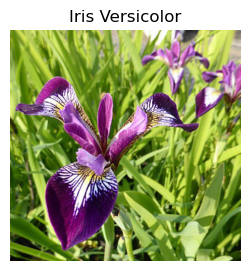

In [160]:
plt.figure(figsize=(9, 3))
plt.title("Iris Versicolor")
plt.imshow(numpy_img)
plt.axis('off')
plt.show()

### Mostrando imagens monocromáticas (1 canal) no Matplotlib

In [161]:
img2 = Image.open('../figures/versicolor_BW.png')
numpy_img2 = np.array(img2)
numpy_img2.shape, numpy_img2.dtype, numpy_img2.min(), numpy_img2.max()

((400, 400), dtype('uint8'), 0, 255)

Por padrão, o Matplotlib utiliza uma tabela de cor falsa (pseudo cor) quando visualiza uma imagem de um único canal. A função colorbar() mostra a tabela de cor utilizada:

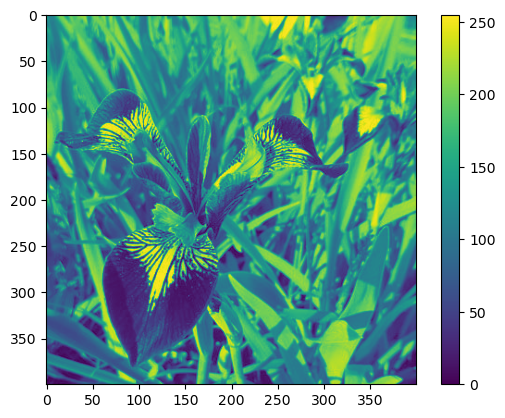

In [162]:
plt.imshow(numpy_img2)
plt.colorbar();

Para visualizar a imagem en tons de cinza, deve-se informar a tabela gray, no parâmetro cmap do imshow.

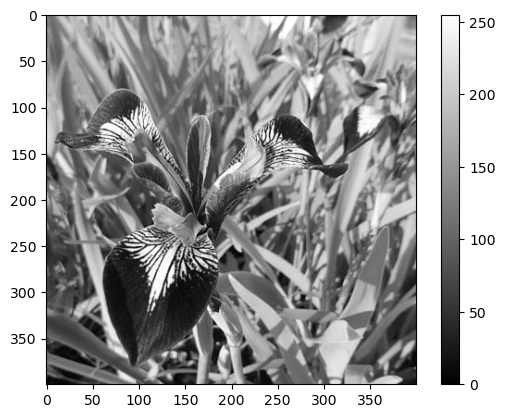

In [163]:
plt.imshow(numpy_img2, cmap='gray')
plt.colorbar()

**ATENÇÃO**: Assim como a visualização padrão do Matplotlib para imagens de um único canal utiliza pseudo cores, os pacotes para visualização de imagens podem realizar manipulações de forma automática nas imagens para melhorar sua visualização. Portanto, é necessário tomar cuidado ao interpretar as imagens de forma visual, sendo recomendado sempre verificar os valores numéricos que estão armazenados no array para garantir que a interpretação é correta.

No exemplo abaixo, criamos uma imagem de 8 bits (valores de 0 a 255) na qual os pixels superiores possuem valor 150 e os pixels inferiores possuem valor 100. Se plotarmos a imagem com o Matplotlib sem nenhum cuidado extra, poderíamos interpretar de forma errônea que os pixels brancos possuem valor máximo (255) enquanto os pixels pretos possuem valor mínimo (0). Isso ocorre pois o Matplotlib tende a normalizar as imagens plotadas, definindo o preto para o menor valor apresentado na imagem e o branco para o maior valor. Para visualizar corretamente os níveis de cinza da imagem é necessário especificar qual a faixa de valores que está sendo considerada (neste caso, de 0 a 255).

Observe que o PIL gera uma visualização com os níveis de cinza esperados. Além disso, fica perceptível que o Matplotlib está ampliando a imagem - que possui apenas 40x40 pixels.

Valores únicos da imagem: [100 150]


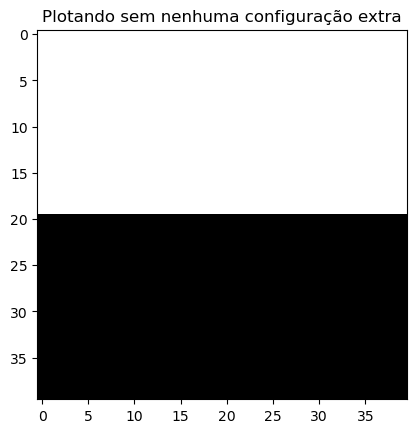

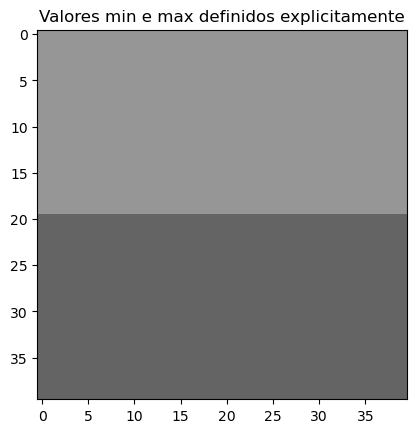

Visualizando com o PIL


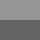

In [176]:
img_teste = np.ones((40,40), dtype='uint8')*100
img_teste[:20,:] = 150
print('Valores únicos da imagem:', np.unique(img_teste))
# Plot direto, sem nenhuma configuração extra
plt.imshow(img_teste, cmap='gray')
plt.title('Plotando sem nenhuma configuração extra')
plt.show()
# Plot configurado para visualização correta dos níveis de cinza dos pixels
plt.imshow(img_teste, cmap='gray', vmin=0, vmax=255)
plt.title('Valores min e max definidos explicitamente')
plt.show()
# Visualizando a imagem com o PIL
img_teste2 = Image.fromarray(img_teste)
print('Visualizando com o PIL')
display(img_teste2)

### Plotando mais de uma imagem/gráfico em uma única figura

A função *plt.subplots()* simplifica a criação de múltiplos plots em uma única figura, permitindo visualizar várias imagens e gráficos de forma simultânea e organizada. Ela retorna o layout de uma figura (o contêiner de mais alto nível para todos os elementos da figura) e um objeto ou array de objetos do tipo *Axes* (cada objeto encapsula todos os elementos de um subplot individual da figura).

Observe o exemplo abaixo utilizando o *subplots* sem nenhum argumento. Neste caso, apenas um objeto *Axes* é retornado.

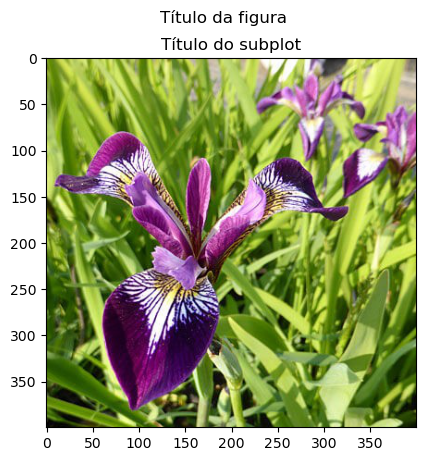

In [165]:
# Plotando uma única imagem com o subplots
fig, ax = plt.subplots()
ax.imshow(numpy_img)
ax.set_title('Título do subplot')
fig.suptitle('Título da figura');

Para plotar mais de uma imagem, é necessário definir o número de linhas e colunas da grade de subplots, que correspondem aos dois primeiros argumentos da função.

Os exemplos abaixo mostram como empilhar imagens em apenas uma direção (vertical ou horizontal). Note que, neste caso, a variável **axs** é um array 1D contendo a lista de *Axes* criados e é necessário especificar qual deles será utilizado para plotar cada imagem (0 ou 1, por exemplo). Ainda, é possível desempacotar os *Axes* em variáveis dedicadas para cada um deles (usando ax1 e ax2 ao invés de axs[0] e axs[1], por exemplo).

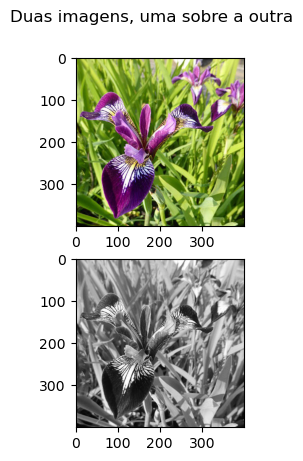

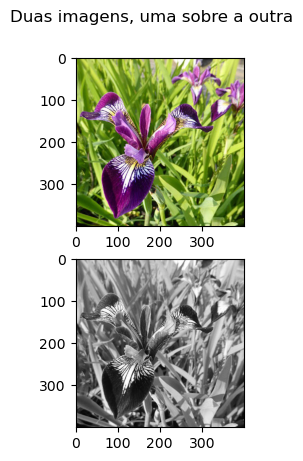

In [166]:
# Plotando duas imagens, uma sobre a outra (empilhamento vertical)

fig, axs = plt.subplots(2)
fig.suptitle('Duas imagens, uma sobre a outra')
axs[0].imshow(numpy_img)
axs[1].imshow(numpy_img2, cmap='gray')

# Ou, de forma equivalente

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Duas imagens, uma sobre a outra')
ax1.imshow(numpy_img)
ax2.imshow(numpy_img2, cmap='gray');

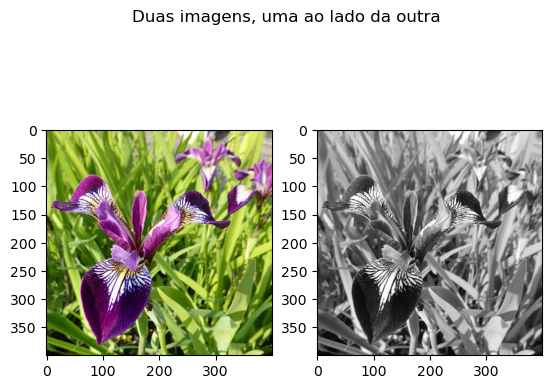

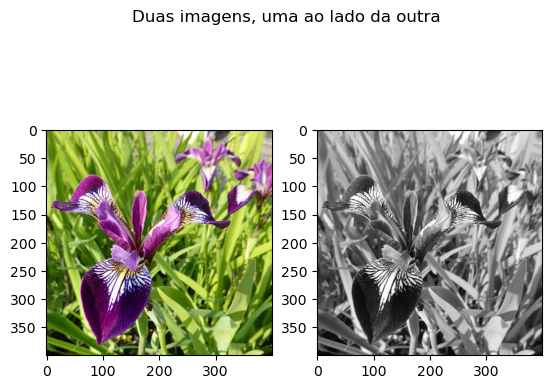

In [167]:
# Plotando duas imagens, uma ao lado da outra (empilhamento horizontal)

fig, axs = plt.subplots(1, 2)
fig.suptitle('Duas imagens, uma ao lado da outra')
axs[0].imshow(numpy_img)
axs[1].imshow(numpy_img2, cmap='gray')

# Ou, de forma equivalente

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Duas imagens, uma ao lado da outra')
ax1.imshow(numpy_img)
ax2.imshow(numpy_img2, cmap='gray');

É possível também empilhar imagens/gráficos nas duas direções (horizontal e vertical). Neste caso, a variável **axs** é um array 2D.

Abaixo temos o exemplo de uma figura com quatro elementos gráficos utilizando uma grade 2x2.

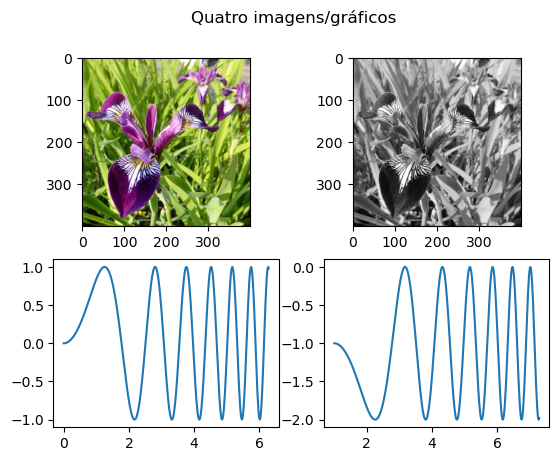

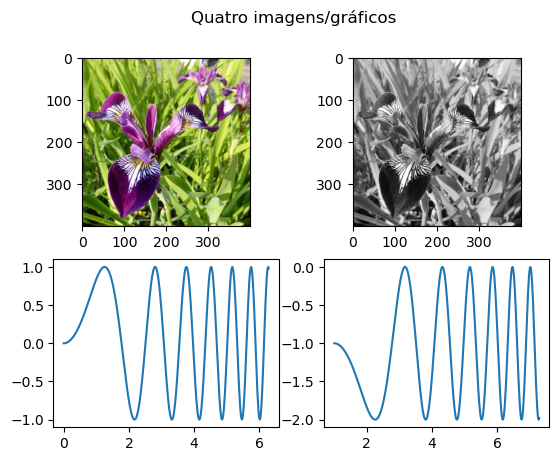

In [168]:
# Plotando imagens/gráficos nas duas direções (horizontal e vertical)

fig, axs = plt.subplots(2, 2)
fig.suptitle('Quatro imagens/gráficos')
axs[0,0].imshow(numpy_img)
axs[0,1].imshow(numpy_img2, cmap='gray')
# Criando dados para exemplificar gráficos
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
axs[1,0].plot(x,y)
axs[1,1].plot(x+1,-y-1)

# Ou, de forma equivalente

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Quatro imagens/gráficos')
ax1.imshow(numpy_img)
ax2.imshow(numpy_img2, cmap='gray')
ax3.plot(x,y)
ax4.plot(x+1,-y-1);

Suponha que tenhamos uma lista de imagens a serem plotadas em uma única figura. Ao invés de definir qual imagem será plotada em cada *Axes* esepecífico, podemos utilizar o *axs.flat* para gerar os subplots de forma mais automática, como exemplificado abaixo.

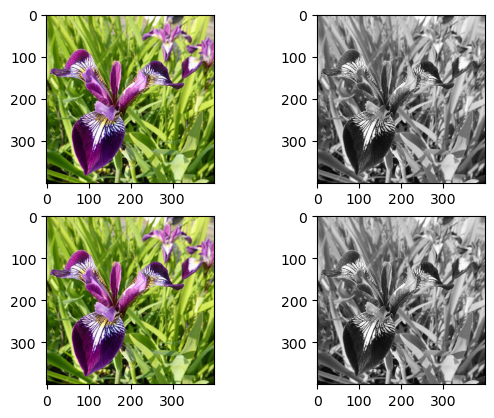

In [169]:
list_imgs = [img, img1, numpy_img, numpy_img2]

fig, axs = plt.subplots(2, 2)
for n,ax in enumerate(axs.flat):
    ax.imshow(list_imgs[n], cmap='gray')

A função *plt.subplots* também possui outros argumentos opcionais que podem ser bastante úteis. Em especial, podemos destacar:

- *figsize*: determina o tamanho da figura a ser gerada
- *sharex* e *sharey*: determina se os eixos x ou y serão compartilhados entre os subplots
- *width_ratios* e *height_ratios*: determina a largura/altura relativa das colunas/linhas da grade de subplots

No exemplo abaixo, além de especificar o tamanho da figura, definimos que os eixos y serão compartilhados entre os subplots que estão na mesma linha e que a primeira linha terá o dobro da altura da segunda.

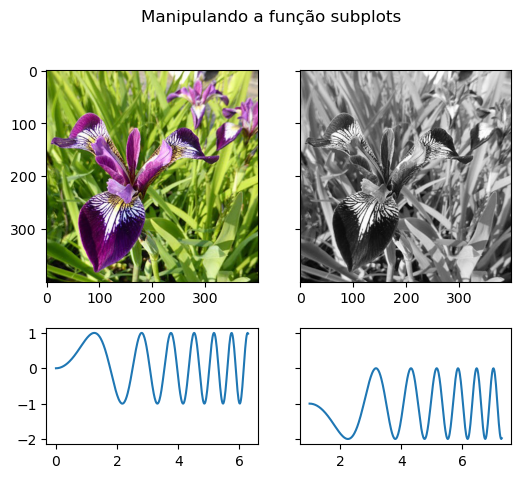

In [170]:
# Manipulando a função subplots
fig, axs = plt.subplots(2, 2, figsize=(6,5), sharey='row', height_ratios=(2,1))
fig.suptitle('Manipulando a função subplots')
axs[0,0].imshow(numpy_img)
axs[0,1].imshow(numpy_img2, cmap='gray')
# Criando dados para exemplificar gráficos
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
axs[1,0].plot(x,y)
axs[1,1].plot(x+1,-y-1);

Como você pode ter observado, ao utilizar a função *plt.subplots()* precisamos manipular e configurar cada subplot de maneira individual. Observe abaixo o que acontece quando utilizamos diretamente as funções de manipulação do plot ao invés de especificar os *Axes*.

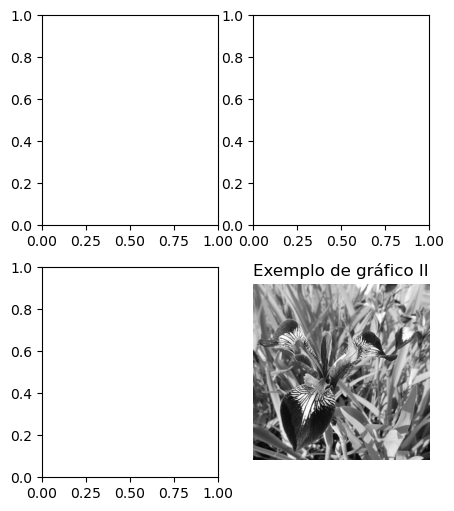

In [171]:
list_imgs = [img, img1, numpy_img, numpy_img2]
list_titles = ['Iris Versicolor', 'Iris Versicolor BW', 'Exemplo de gráfico I', 'Exemplo de gráfico II']

fig, axs = plt.subplots(2, 2, figsize=(5,6))
for n,ax in enumerate(axs.flat):
    plt.imshow(list_imgs[n], cmap='gray')
    plt.title(list_titles[n])
    plt.axis('off')

Podemos ver que as alterações foram aplicadas apenas ao último subplot da figura, deixando os três primeiros subplots vazios.

Para que o código anterior funcione de forma correta, seria necessário especificar qual subplot estamos manipulando, através da função *plt.subplot*. De forma simplificada, ela recebe três números inteiros correspondentes ao número de linhas, colunas e o index do subplot que se deseja manipular. Observe o exemplo abaixo.

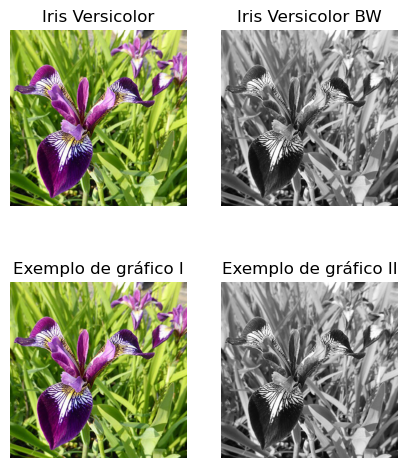

In [172]:
list_imgs = [img, img1, numpy_img, numpy_img2]
list_titles = ['Iris Versicolor', 'Iris Versicolor BW', 'Exemplo de gráfico I', 'Exemplo de gráfico II']

fig, axs = plt.subplots(2, 2, figsize=(5,6))
for n,ax in enumerate(axs.flat):
    plt.subplot(2, 2, 1+n)
    plt.imshow(list_imgs[n], cmap='gray')
    plt.title(list_titles[n])
    plt.axis('off')

Existem ainda diversas funções específicas para manipular os *Axes*. Por exemplo, ao invés de *plt.title()*, para definir o título de um subplot podemos utilizar *ax.set_title()*. Veja abaixo um exemplo mais completo de manipulação dos subplots.

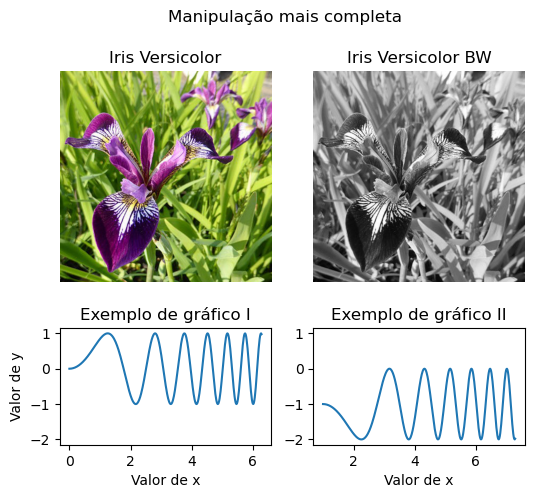

In [173]:
# Manipulando a função subplots
fig, axs = plt.subplots(2, 2, figsize=(6,5), height_ratios=(2,1))
fig.suptitle('Manipulação mais completa')

axs[0,0].imshow(numpy_img)
axs[0,0].set_title('Iris Versicolor') # Título do subplot
axs[0,0].set_axis_off() # Removendo os eixos do subplot

axs[0,1].imshow(numpy_img2, cmap='gray')
axs[0,1].set_title('Iris Versicolor BW') # Título do subplot
axs[0,1].set_axis_off() # Removendo os eixos do subplot

# Criando dados para exemplificar gráficos
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

axs[1,0].plot(x,y)
axs[1,0].set_title('Exemplo de gráfico I') # Título do subplot
axs[1,0].set_xlabel('Valor de x') # Label do eixo x
axs[1,0].set_ylabel('Valor de y') # Label do eixo y

axs[1,1].plot(x+1,-y-1);
axs[1,1].set_title('Exemplo de gráfico II') # Título do subplot
axs[1,1].set_xlabel('Valor de x') # Label do eixo x
axs[1,1].sharey(axs[1,0]) # Definindo que o subplot [1,1] compartilha o eixo y com o subplot [1,0]

### Leitura de imagens com Matplotlib

Existe um cuidado especial quando utilizar o Matplotlib para ler imagens. Dependendo do formato do arquivo da imagem, o arrary NumPy lido pode ser normalizado.

In [174]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor_BW.png')
f.shape, f.dtype, f.min(), f.max()

((400, 400), dtype('float32'), 0.0, 1.0)

In [175]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor.jpg')
f.shape, f.dtype, f.min(), f.max()

((400, 400, 3), dtype('uint8'), 0, 255)